# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key
#!pip install citipy
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:

from tkinter import UNITS


url = "http://api.openweathermap.org/data/2.5/weather?" 
units="metric"
query_url=query_url = f"{url}appid={weather_api_key}&units={units}&q="
# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        city_temp=city_weather["main"]["temp"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | torbay
Processing Record 2 of Set 1 | barrow
Processing Record 3 of Set 1 | grand gaube
Processing Record 4 of Set 1 | beloha
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | veraval
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | nanortalik
Processing Record 9 of Set 1 | norman wells
Processing Record 10 of Set 1 | ust-ordynskiy
Processing Record 11 of Set 1 | shizunai
Processing Record 12 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 13 of Set 1 | saldanha
Processing Record 14 of Set 1 | college
Processing Record 15 of Set 1 | tabulbah
City not found. Skipping...
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | pattaya
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | san gabriel
Processing Record 20 of Set 1 | upernavik
Processing Record 21 of Set 1 | mataura
Processing Record 22 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data_df=pd.DataFrame(city_data)

In [6]:
city_data_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,torbay,47.6666,-52.7314,15.16,97,100,5.66,CA,1663021246
1,barrow,71.2906,-156.7887,3.01,93,100,8.75,US,1663021246
2,grand gaube,-20.0064,57.6608,20.77,70,66,1.34,MU,1663021246
3,beloha,-25.1667,45.0500,17.51,97,7,1.72,MG,1663021247
4,jamestown,42.0970,-79.2353,20.85,71,20,3.60,US,1663021247
5,veraval,20.9000,70.3667,25.59,94,100,7.00,IN,1663021248
6,albany,42.6001,-73.9662,24.82,81,72,1.27,US,1663021248
7,nanortalik,60.1432,-45.2371,6.12,94,23,3.84,GL,1663021249
8,norman wells,65.2820,-126.8329,17.02,39,75,1.54,CA,1663021249
9,ust-ordynskiy,52.8050,104.7508,9.29,88,100,3.10,RU,1663021008


In [7]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        555 non-null    object 
 1   Lat         555 non-null    float64
 2   Lng         555 non-null    float64
 3   Max Temp    555 non-null    float64
 4   Humidity    555 non-null    int64  
 5   Cloudiness  555 non-null    int64  
 6   Wind Speed  555 non-null    float64
 7   Country     555 non-null    object 
 8   Date        555 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 39.1+ KB


In [9]:
city_data_df.to_csv("cityweather_Output.csv",index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
#  Get the indices of cities that have humidity over 100%.


high_humidity_data = city_data_df[(city_data_df["Humidity"] > 100)].index
                                  
high_humidity_data

Int64Index([], dtype='int64')

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [14]:
clean_city_data = city_data_df.drop(high_humidity_data, inplace=False)
clean_city_data.head(20)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,torbay,47.6666,-52.7314,15.16,97,100,5.66,CA,1663021246
1,barrow,71.2906,-156.7887,3.01,93,100,8.75,US,1663021246
2,grand gaube,-20.0064,57.6608,20.77,70,66,1.34,MU,1663021246
3,beloha,-25.1667,45.0500,17.51,97,7,1.72,MG,1663021247
4,jamestown,42.0970,-79.2353,20.85,71,20,3.60,US,1663021247
5,veraval,20.9000,70.3667,25.59,94,100,7.00,IN,1663021248
6,albany,42.6001,-73.9662,24.82,81,72,1.27,US,1663021248
7,nanortalik,60.1432,-45.2371,6.12,94,23,3.84,GL,1663021249
8,norman wells,65.2820,-126.8329,17.02,39,75,1.54,CA,1663021249
9,ust-ordynskiy,52.8050,104.7508,9.29,88,100,3.10,RU,1663021008


## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'City Latitude vs Temperature')

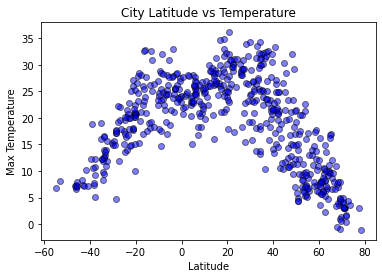

In [15]:

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolors="blue", edgecolors="black", alpha = 0.5)


plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("City Latitude vs Temperature")
plt.savefig('citytemp.png')
print("The plot shows as latitude increases , the temperature falls and vice versa.")


## Latitude vs. Humidity Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and humidity


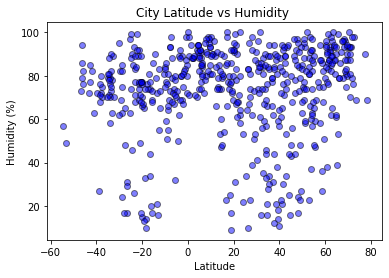

In [16]:

plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolors="blue", edgecolors="black", alpha = 0.5)

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity ")
plt.savefig('cityhumidity.png')
print("The plot shows that there is no real pattern that can describe the relationship between latitude and humidity.")

## Latitude vs. Cloudiness Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and humidity


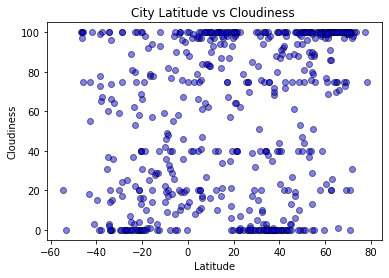

In [17]:
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolors="blue", edgecolors="black", alpha = 0.5)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness ")
print("The plot suggests that latitude does not cause an area to be more cloudy or less cloudy. Hance, there is no direct relationship betweeen latitude and cloudiness.")

## Latitude vs. Wind Speed Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and humidity


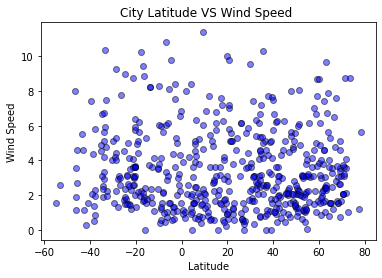

In [18]:
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolors="blue", edgecolors="black", alpha = 0.5)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude VS Wind Speed ")
print("The plot seems to prove out that the latitude will not impact the wind speed.")

## Linear Regression

In [19]:
nor_hemisphere_data = city_data_df.loc[city_data_df["Lat"] > 0,:]
nor_hemisphere_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,torbay,47.6666,-52.7314,15.16,97,100,5.66,CA,1663021246
1,barrow,71.2906,-156.7887,3.01,93,100,8.75,US,1663021246
4,jamestown,42.0970,-79.2353,20.85,71,20,3.60,US,1663021247
5,veraval,20.9000,70.3667,25.59,94,100,7.00,IN,1663021248
6,albany,42.6001,-73.9662,24.82,81,72,1.27,US,1663021248
...,...,...,...,...,...,...,...,...,...
546,vite,17.2833,74.5500,21.19,98,100,7.60,IN,1663021446
549,hongjiang,27.1100,109.9956,20.98,81,0,0.32,CN,1663021448
550,goedereede,51.8175,3.9806,20.54,82,100,2.00,NL,1663021448
551,virginia beach,36.8529,-75.9780,31.68,66,0,4.63,US,1663021448


In [20]:
sou_hemisphere_data = city_data_df.loc[city_data_df["Lat"] < 0,:]
sou_hemisphere_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,grand gaube,-20.0064,57.6608,20.77,70,66,1.34,MU,1663021246
3,beloha,-25.1667,45.0500,17.51,97,7,1.72,MG,1663021247
11,saldanha,-33.0117,17.9442,11.03,78,0,7.51,ZA,1663021250
13,rikitea,-23.1203,-134.9692,22.76,68,80,1.50,PF,1663021251
18,mataura,-46.1927,168.8643,6.93,94,100,1.17,NZ,1663021253
...,...,...,...,...,...,...,...,...,...
545,burnie,-41.0667,145.9167,7.19,63,3,1.55,AU,1663021413
547,kupang,-10.1667,123.5833,23.32,83,42,2.34,ID,1663021447
548,namibe,-15.1961,12.1522,17.48,86,78,1.76,AO,1663021447
552,bolobo,-2.1667,16.2333,22.97,81,46,1.08,CD,1663021448


###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5810775806976759


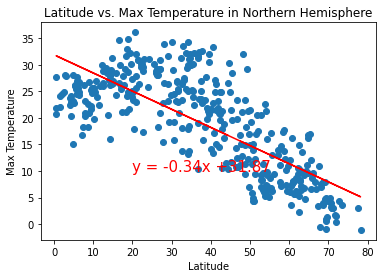

In [23]:
x_values = nor_hemisphere_data["Lat"]
y_values = nor_hemisphere_data["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Latitude vs. Max Temperature in Northern Hemisphere')
plt.annotate(line_eq,(20,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6522719628231136


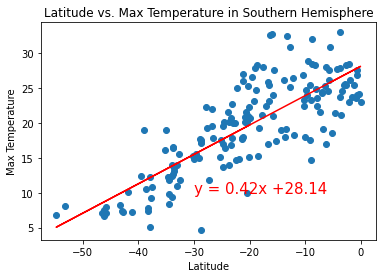

In [24]:
x_values = sou_hemisphere_data["Lat"]
y_values = sou_hemisphere_data["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Latitude vs. Max Temperature in Southern Hemisphere')
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot

plt.show()

### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0001611666750289457


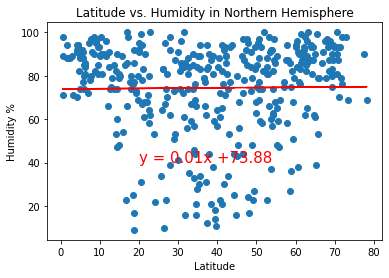

In [25]:
x_values = nor_hemisphere_data["Lat"]
y_values = nor_hemisphere_data["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel(f'Humidity %')
plt.title('Latitude vs. Humidity in Northern Hemisphere')
plt.annotate(line_eq,(20,40),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.002055585950284553


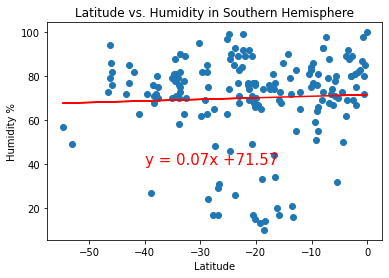

In [26]:
x_values = sou_hemisphere_data["Lat"]
y_values = sou_hemisphere_data["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel(f'Humidity %')
plt.title('Latitude vs. Humidity in Southern Hemisphere')
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot

plt.show()

### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.029202778357420408


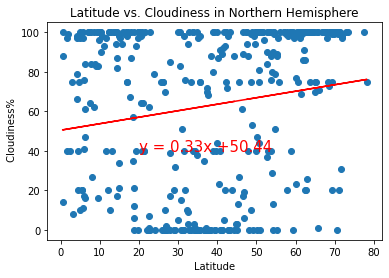

In [27]:
x_values = nor_hemisphere_data["Lat"]
y_values = nor_hemisphere_data["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel(f' Cloudiness%')
plt.title('Latitude vs. Cloudiness in Northern Hemisphere')
plt.annotate(line_eq,(20,40),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0005745727222422797


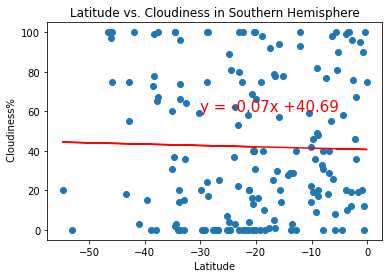

In [28]:
x_values = sou_hemisphere_data["Lat"]
y_values = sou_hemisphere_data["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel(f' Cloudiness%')
plt.title('Latitude vs. Cloudiness in Southern Hemisphere')
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot

plt.show()

### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.00286017223540356


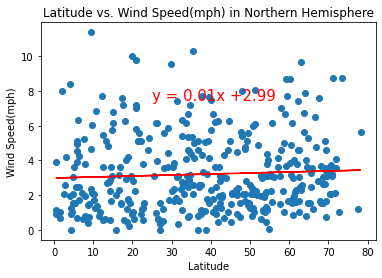

In [30]:
x_values = nor_hemisphere_data["Lat"]
y_values = nor_hemisphere_data["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel(f'Wind Speed(mph)')
plt.title('Latitude vs. Wind Speed(mph) in Northern Hemisphere')
plt.annotate(line_eq,(25,7.5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 3.905394312871532e-05


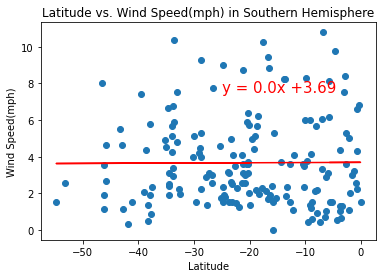

In [31]:
x_values = sou_hemisphere_data["Lat"]
y_values = sou_hemisphere_data["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel(f'Wind Speed(mph)')
plt.title('Latitude vs. Wind Speed(mph) in Southern Hemisphere')
plt.annotate(line_eq,(-25,7.5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot

plt.show()